In [15]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot

import auxil_ML as aux

In [72]:
folder = '../SOM'

cat = '4FGL'
nclasses = 3

if cat == '4FGL':
    cat_name = '4FGL-DR2_prob_catalog_%iclasses' % nclasses
elif cat == '3FGL':
    cat_name_out = '3FGL_prob_catalog_%iclasses' % nclasses


In [73]:
def index(E):
    def f(index, beta, ln_E0):
        return index + 2 * beta * (np.log(E) - ln_E0)
    return f

In [74]:
cat_fn = '%s/%s.csv' % (folder, cat_name)
pcat = pd.read_csv(cat_fn, index_col=0)


In [75]:
pcat.columns

Index(['cos(GLON)', 'GLAT', 'ln(Energy_Flux100)', 'ln(Unc_Energy_Flux100)',
       'ln(Pivot_Energy)', 'LP_Index', 'Unc_LP_Index', 'LP_beta', 'LP_SigCurv',
       'ln(Variability_Index)', 'HR12', 'HR23', 'HR34', 'HR45', 'HR56', 'HR67',
       'Category_4FGL', 'CLASS_4FGL', 'ASSOC_FGL', 'ASSOC1', 'Flags_4FGL',
       'AGN_BDT', 'AGN_BDT_STD', 'PSR_BDT', 'PSR_BDT_STD', 'OTHER_BDT',
       'OTHER_BDT_STD', 'AGN_NN', 'AGN_NN_STD', 'PSR_NN', 'PSR_NN_STD',
       'OTHER_NN', 'OTHER_NN_STD', 'AGN_RF', 'AGN_RF_STD', 'PSR_RF',
       'PSR_RF_STD', 'OTHER_RF', 'OTHER_RF_STD', 'AGN_LR', 'AGN_LR_STD',
       'PSR_LR', 'PSR_LR_STD', 'OTHER_LR', 'OTHER_LR_STD', 'AGN_BDT_O',
       'AGN_BDT_STD_O', 'PSR_BDT_O', 'PSR_BDT_STD_O', 'OTHER_BDT_O',
       'OTHER_BDT_STD_O', 'AGN_NN_O', 'AGN_NN_STD_O', 'PSR_NN_O',
       'PSR_NN_STD_O', 'OTHER_NN_O', 'OTHER_NN_STD_O', 'AGN_RF_O',
       'AGN_RF_STD_O', 'PSR_RF_O', 'PSR_RF_STD_O', 'OTHER_RF_O',
       'OTHER_RF_STD_O', 'AGN_LR_O', 'AGN_LR_STD_O', 'PSR_LR_O',

In [76]:
set(pcat['Category_Prob'])

{'AGN', 'MIXED', 'OTHER', 'PSR'}

In [77]:
masks_unas = {}
masks = {}
cats = ['OTHER', 'PSR', 'AGN']
for key in cats:
    masks[key] = (pcat['Category_Prob'] == key)
for key in cats:
    masks_unas[key] = (pcat['Category_Prob'] == key) & (pcat['Category_4FGL'] == 'UNAS')


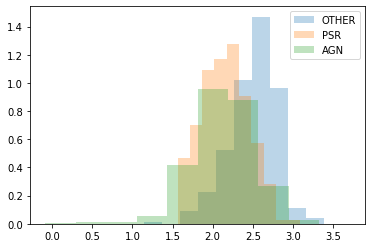

In [78]:
pyplot.figure()
for key in cats:
    vals = pcat['LP_Index'][masks[key]]
    pyplot.hist(vals, alpha=0.3, label=key, density=True)
pyplot.legend()

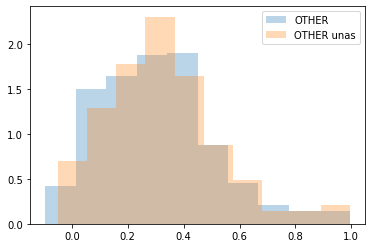

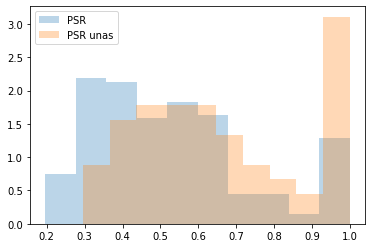

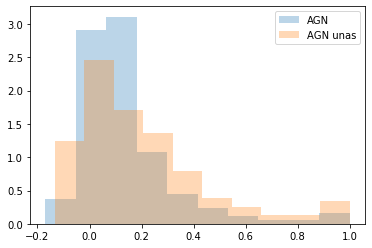

In [79]:
for key in cats:
    pyplot.figure()
    vals = pcat['LP_beta'][masks[key]]
    pyplot.hist(vals, alpha=0.3, label=key, density=True)
    vals = pcat['LP_beta'][masks_unas[key]]
    pyplot.hist(vals, alpha=0.3, label=key + ' unas', density=True)
    pyplot.legend()

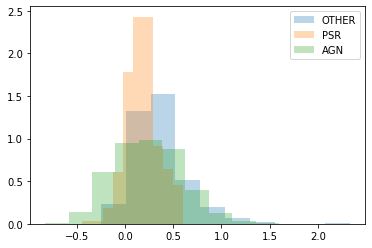

In [80]:
pyplot.figure()
for key in cats:
    vals = pcat['ln(Pivot_Energy)'][masks[key]]/np.log(10) - 3.
    pyplot.hist(vals, alpha=0.3, label=key, density=True)
pyplot.legend()


OTHER index = 2.603 +- 0.556
unas OTHER index = 2.640 +- 0.536
PSR index = 2.410 +- 0.515
unas PSR index = 2.486 +- 0.691
AGN index = 2.144 +- 0.759
unas AGN index = 2.159 +- 0.970


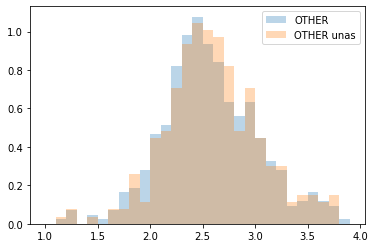

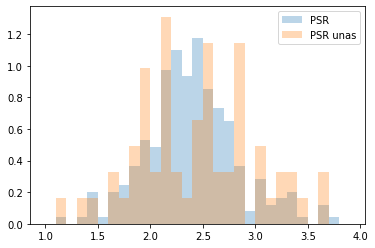

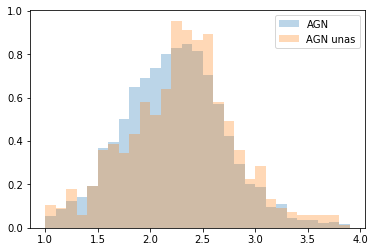

In [81]:
indE = index(2000.)

bins = np.arange(1, 4, 0.1)
for key in cats:
    pyplot.figure()
    alpha = pcat['LP_Index'][masks[key]]
    beta = pcat['LP_beta'][masks[key]]
    ln_E0 = pcat['ln(Pivot_Energy)'][masks[key]]
    vals = indE(alpha, beta, ln_E0)
    print('%s index = %.3f +- %.3f' % (key, np.mean(vals), np.std(vals)))
    pyplot.hist(vals, alpha=0.3, label=key, density=True, bins=bins)
    alpha = pcat['LP_Index'][masks_unas[key]]
    beta = pcat['LP_beta'][masks_unas[key]]
    ln_E0 = pcat['ln(Pivot_Energy)'][masks_unas[key]]
    vals = indE(alpha, beta, ln_E0)
    print('unas %s index = %.3f +- %.3f' % (key, np.mean(vals), np.std(vals)))
    pyplot.hist(vals, alpha=0.3, label=key + ' unas', density=True, bins=bins)
    pyplot.legend()

<Figure size 432x288 with 0 Axes>

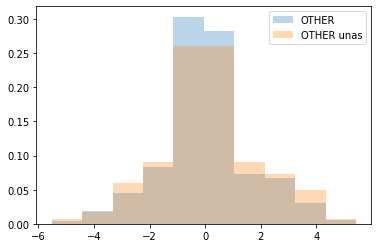

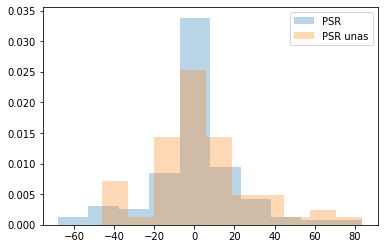

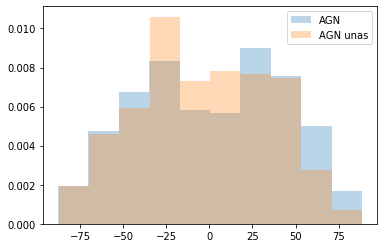

In [82]:
var_name = 'GLAT'
pyplot.figure()
for key in cats:
    pyplot.figure()
    vals = pcat[var_name][masks[key]]
    pyplot.hist(vals, alpha=0.3, label=key, density=True)
    #pyplot.xlim(-90, 90)
    vals = pcat[var_name][masks_unas[key]]
    pyplot.hist(vals, alpha=0.3, label=key + ' unas', density=True)
    #pyplot.xlim(-90, 90)
    pyplot.legend()